In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from skimage import morphology
from skimage import img_as_ubyte

import os
os.chdir("../")
from Sources.tools import *

# Data Loading

In [2]:
breast_images = load_images()
infos_df = load_infos()

100%|██████████| 322/322 [00:00<00:00, 12836.25it/s]


In [58]:
image = breast_images[3]

# Data pre processing

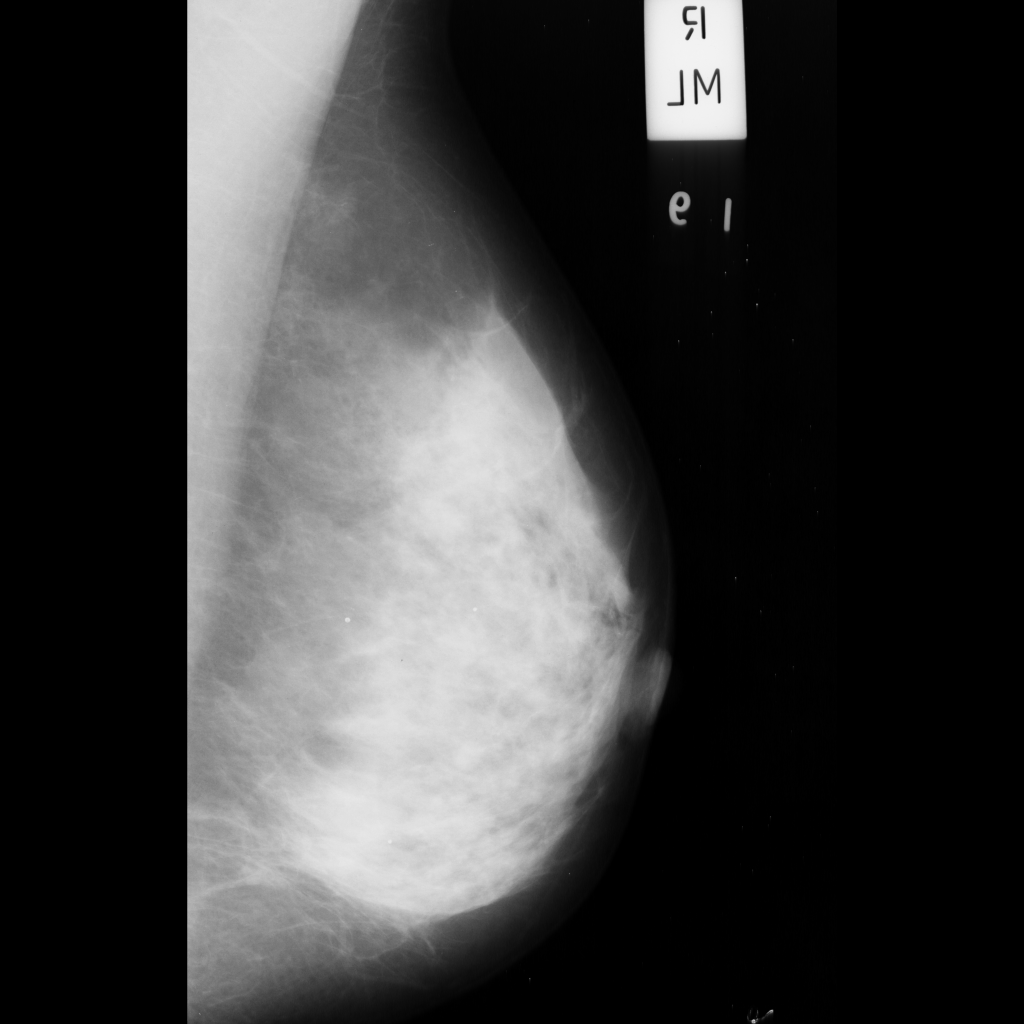

In [7]:
image

In [38]:
thresh = 30  # Seuil entre 0 et 255, ajustez selon vos besoins
binary_image = image.point(lambda p: 255 if p > thresh else 0)

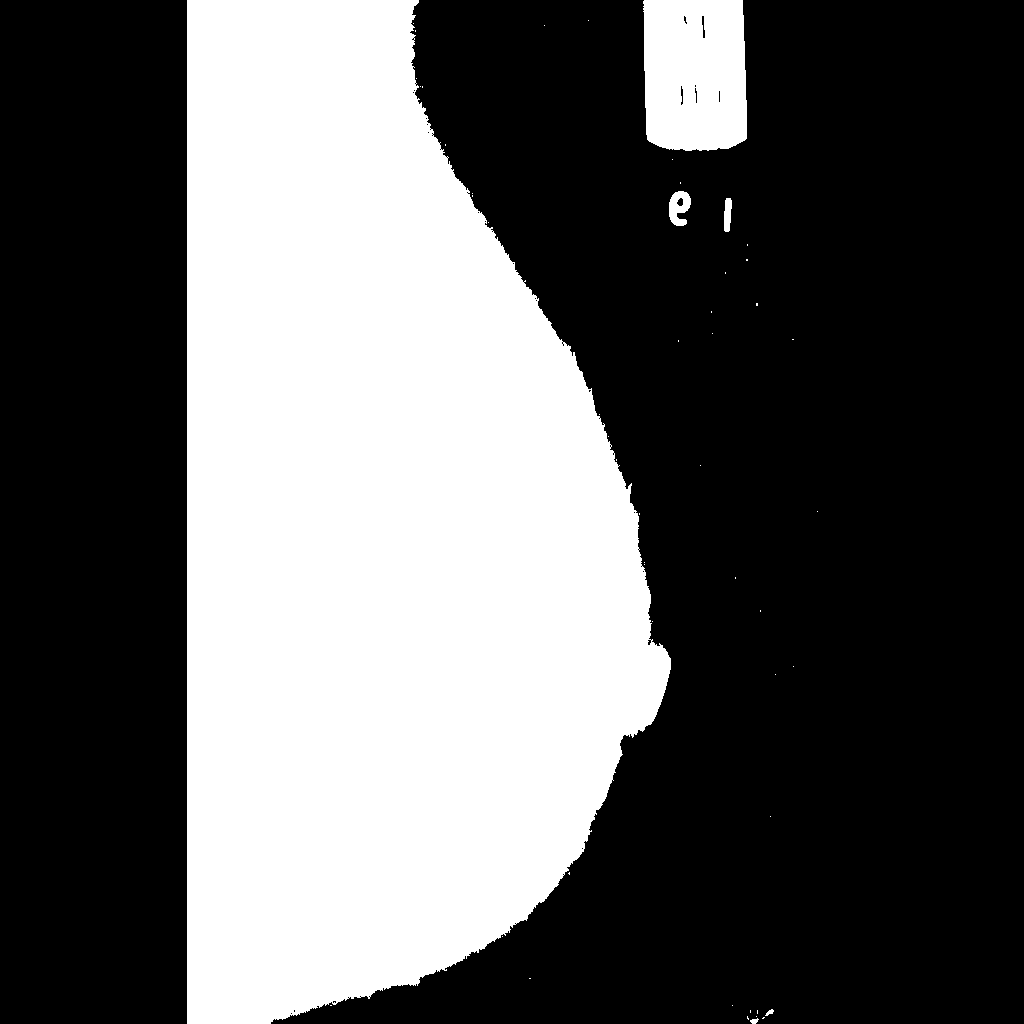

In [39]:
binary_image

C:\Users\planc\AppData\Local\Temp\ipykernel_14504\932107713.py:7: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  selem1 = morphology.square(60)  # Structuring element, here a 3x3 square


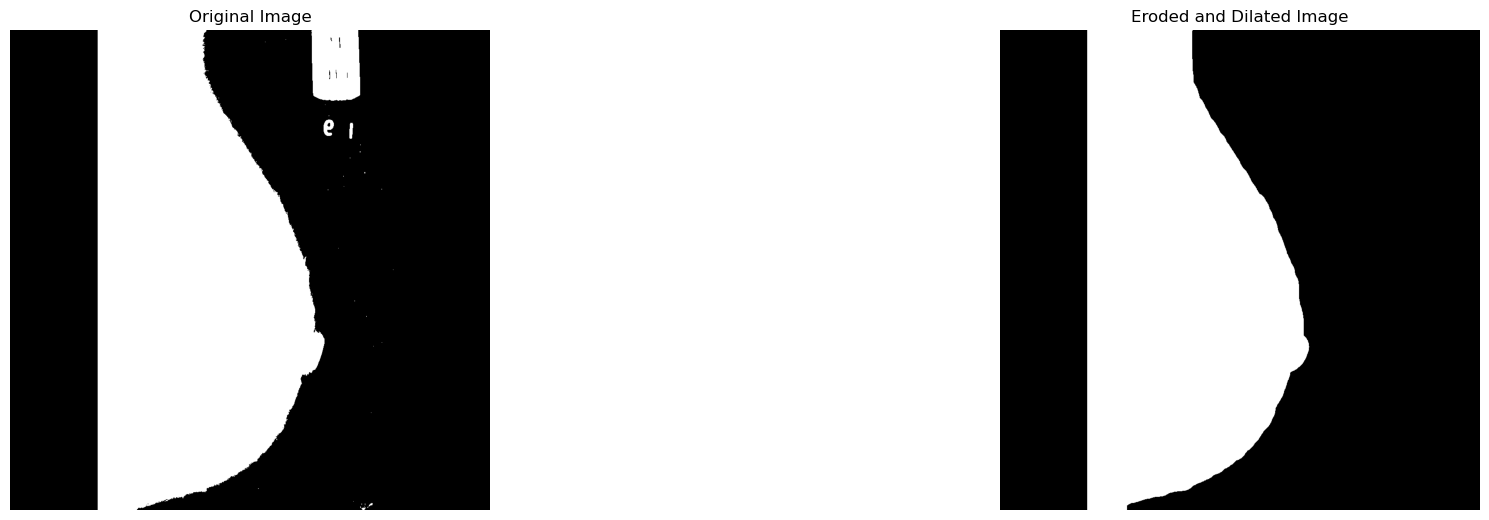

In [54]:
binary_image = np.array(binary_image)

# Convert to a binary mask (True for 255, False for 0)
binary_mask = binary_image > 0

# Apply erosion and dilation
selem1 = morphology.square(60)  # Structuring element, here a 3x3 square
eroded_image = morphology.erosion(binary_mask, selem1)
selem2 = morphology.disk(30)
dilated_image = morphology.dilation(eroded_image, selem2)

# Convert the binary results back to an image
dilated_image = img_as_ubyte(dilated_image)

# Show the results
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Dilated image
plt.subplot(1, 3, 3)
plt.imshow(dilated_image, cmap='gray')
plt.title('Eroded and Dilated Image')
plt.axis('off')

plt.tight_layout()
plt.show()

In [69]:
def remove_label(image):    

    thresh = 30  # Seuil entre 0 et 255, ajustez selon vos besoins
    binary_image = image.point(lambda p: 255 if p > thresh else 0)

    image = np.array(image)
    binary_image = np.array(binary_image)

    # Convert to a binary mask (True for 255, False for 0)
    binary_mask = binary_image > 0

    # Apply erosion and dilation
    selem1 = morphology.square(60)  # Structuring element, here a 3x3 square
    eroded_image = morphology.erosion(binary_mask, selem1)
    selem2 = morphology.disk(60)
    dilated_image = morphology.dilation(eroded_image, selem2)

    # Convert the binary results back to an image
    dilated_image = img_as_ubyte(dilated_image)

    # Convert dilated image to mask (True for dilated, False for everything else)
    dilated_mask = dilated_image > 0

    # Apply the mask to the original image (use the dilated_mask to select areas)
    masked_image = np.zeros_like(image)
    masked_image[dilated_mask] = image[dilated_mask]

    # Convert the result back to an image (if needed)
    masked_image = img_as_ubyte(masked_image)

    return masked_image

In [ ]:
breast_images_without_label = []

for i in tqdm(range(len(breast_images))):
    image = breast_images[i]

    masked_image = remove_label(image)
    breast_images_without_label += [masked_image]

    # plt.figure(figsize=(15,10))

    # plt.subplot(1,2,1)
    # plt.imshow(np.array(image), cmap="grey")
    # plt.axis('off')

    # plt.subplot(1,2,2)
    # plt.imshow(masked_image, cmap="grey")
    # plt.axis('off')

    # plt.tight_layout()
    # plt.show()

np.save('images_without_label.npy', breast_images_without_label)

In [75]:
breast_images_without_label = np.load('images_without_label.npy', allow_pickle=True)